In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [4]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/Ryan/Documents/Data Science/Telco Churn Project/Telco Customer Dataset.csv')

In [5]:
# Data Summary 
print(dataset.describe())

print(dataset.isnull().sum())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Changing "TotalCharges" column to numeric 
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

#Removing Na's arising from converting to numeric
dataset = dataset.dropna(subset=['TotalCharges'])

# Exploratory Data Analysis 

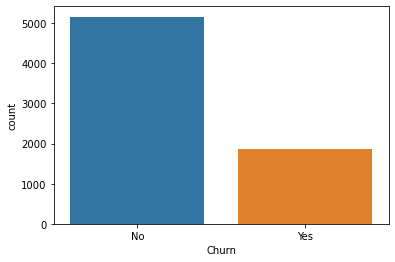

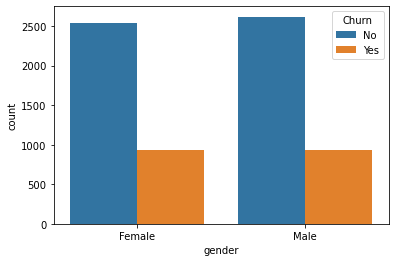

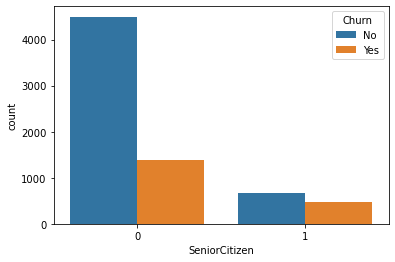

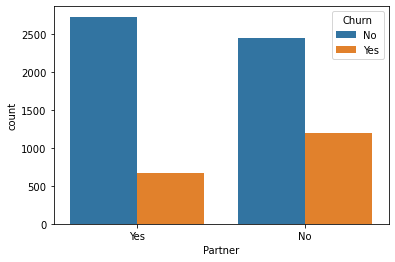

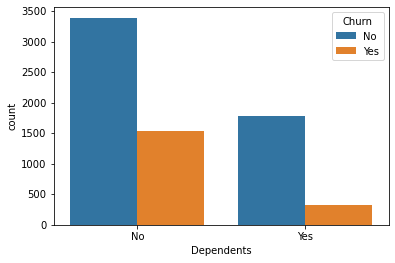

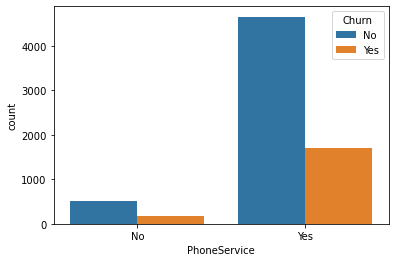

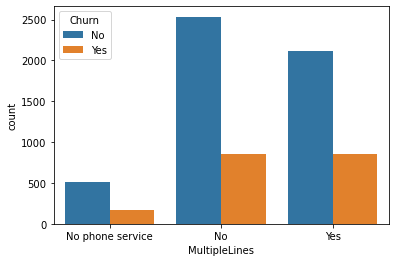

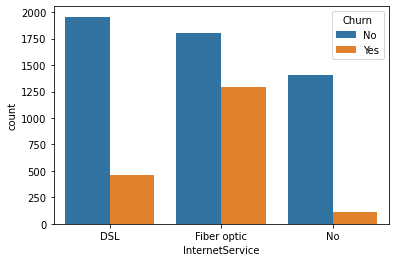

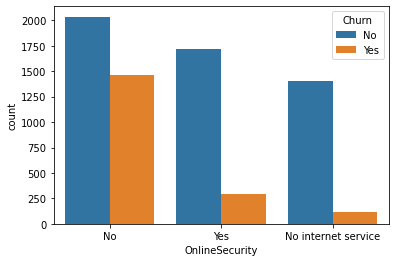

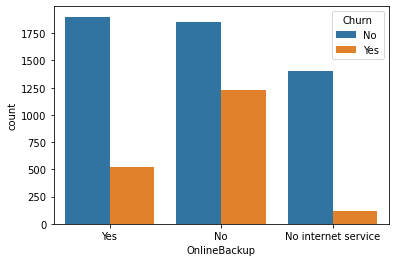

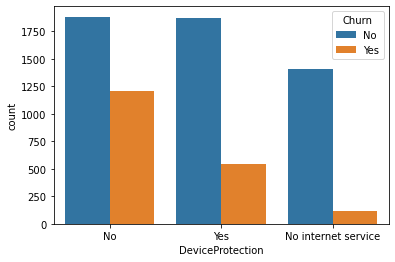

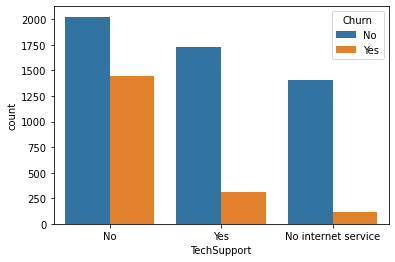

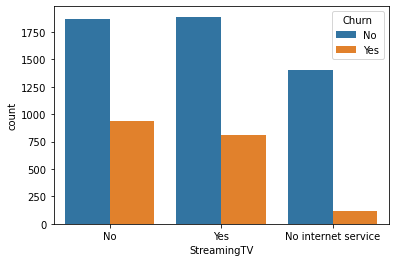

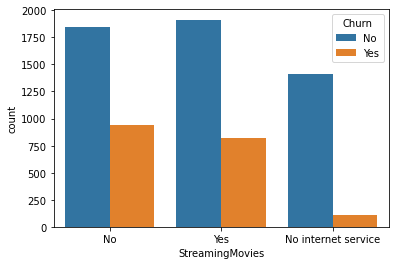

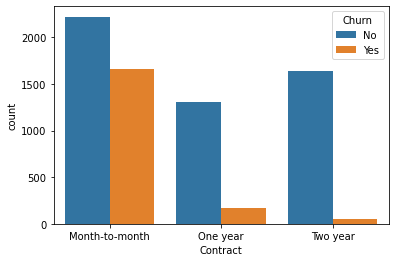

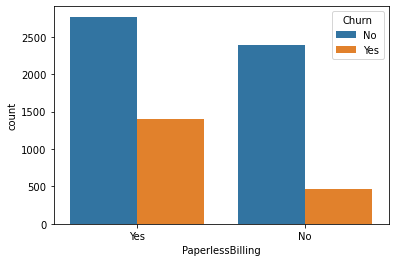

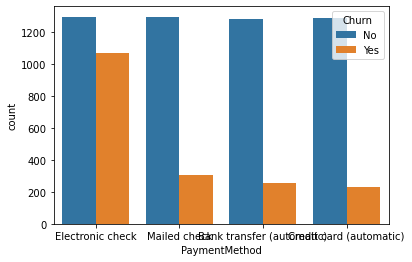

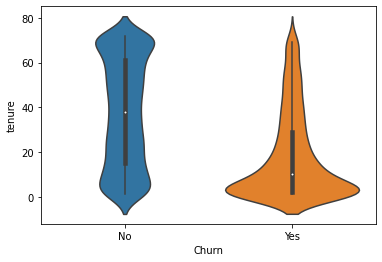

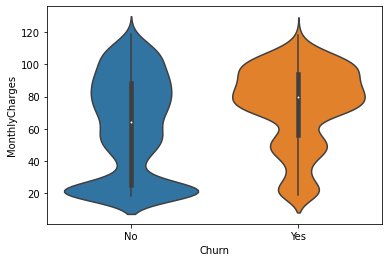

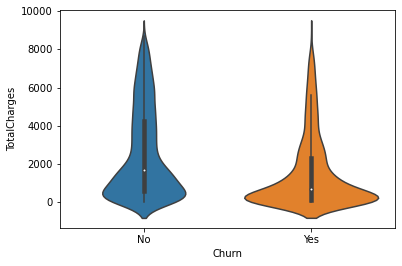

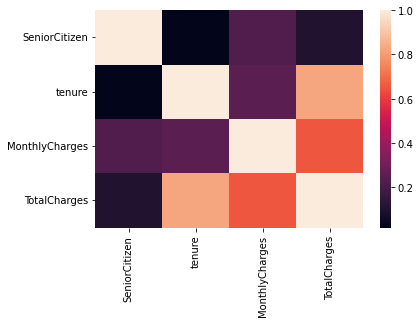

In [7]:
# Distribution of target variable
sns.countplot(x = 'Churn', data = dataset)
plt.show()

# Distribution of target variable across categorical features
categorical_vars = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for var in categorical_vars:
    sns.countplot(x = var, hue = 'Churn', data = dataset)
    plt.show()

# Distribution of target variable across numerical features
numerical_vars = ['tenure','MonthlyCharges','TotalCharges']
for var in numerical_vars:
    sns.violinplot(x = 'Churn', y = var, data = dataset)
    plt.show()

# Correlation between numerical features and target variable
corr = dataset.corr()
sns.heatmap(corr)
plt.show()

In [15]:
# Split the data into features and target variable
x = dataset.drop("Churn", axis=1)
y = dataset["Churn"]

NameError: name 'data' is not defined

In [16]:
missing_values_count = x.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [74]:
# Handling Imbalanced Data
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

ValueError: could not convert string to float: '7590-VHVEG'

In [ ]:
# Model tuning
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(), param_grid)

In [ ]:
# Train the logistic regression model
clf.fit(X_resampled, y_resampled)
print("Best parameters: ", clf.best_params_)

In [ ]:
# cross-validation
scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print("Cross validation ROC-AUC scores: ", scores)

In [ ]:


# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluation metrics
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification report:\n", classification_report)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC: ", roc_auc)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", fscore)